<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
        <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo" />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>



#Abstract

This report delves into the realm of linear regression models, meticulously navigating through multiple steps to ultimately identify the most optimal model. The focal point of the analysis centers around the realm of Used Cars Price Prediction, a domain rife with complexity and nuance. The dataset employed encompasses a rich landscape of 13 distinct features, meticulously curated to encapsulate the multifaceted nature of the cars' attributes. With a robust cohort of 6019 data points, the dataset offers a substantial foundation upon which to build the predictive models.

The report's trajectory commences with data preparation, a crucial phase where raw information is refined into a state suitable for analysis. This phase is marked by the adept handling of categorical data, deftly maneuvered through techniques such as one-hot encoding and label encoding. Simultaneously, the specter of missing data is addressed, with the report offering comprehensive solutions involving the judicious imputation or elimination of null values.

The empirical heart of the report lies in the thorough exploration of various regression models. The triumvirate of linear regression, ridge regression, and lasso regression takes center stage. Each model is meticulously constructed and calibrated, taking into consideration the dataset's intricacies and complexities. The predictive performance of these models is meticulously assessed through the lens of two prominent metrics: the Root Mean Squared Error (RMSE) and the R-squared (R2) coefficient. These metrics are not only evaluative benchmarks but also profound insights into the predictive prowess of the models.

Guided by the empirical insights obtained from the initial model assessment, the report embarks on a journey of hyperparameter tuning for the most promising model. This process, a blend of science and art, entails the deliberate exploration of hyperparameter configurations to optimize the model's performance. The culmination of this endeavor is the ascension of the model to its zenith, delivering a refined predictive capacity that epitomizes the essence of data-driven decision-making.

The grand finale of the report is the meticulous validation of the model's performance using an independent testing dataset. This phase serves as the crucible where the predictive prowess is pitted against real-world data, providing a litmus test for the model's generalization capabilities. The report concludes with a comprehensive evaluation of the model's efficacy, ensuring that the fruits of the analytical labor are not only well-founded in theory but also robust in application.

#Introduction and Dataset description

In this project, I will be using **"Used Cars Price Prediction"** dataset.

The "Used Cars Price Prediction" dataset is a comprehensive and meticulously curated collection of information designed for the task of predicting the prices of pre-owned vehicles. This dataset consists of 6019 samples, each representing a unique used car listing. With a focus on accuracy and relevance, the dataset encompasses a wide range of features that capture key aspects of the vehicles, enabling advanced predictive modeling and analysis.

**Features Included**:
1. Name: The make and model of the used car.
2. Location: The city or region where the car is being sold.
3. Year: The year of manufacture of the car.
4. Kilometers Driven: The total distance the car has been driven in kilometers.
5. Fuel Type: The type of fuel the car uses (e.g., Petrol, Diesel, CNG, LPG, Electric).
6. Transmission: The transmission type of the car (e.g., Manual, Automatic).
7. Owner Type: The number of previous owners of the car.
8. Mileage: The fuel efficiency of the car, measured in kilometers per liter (km/l).
9. Engine: The engine displacement of the car, measured in cubic centimeters (cc).
10. Power: The power output of the car's engine, measured in bhp (brake horsepower).
11. Seats: The number of seats available in the car.
12. New Price: The original price of the car when it was brand new.
13. Price (Target): The current asking price for the used car.



**Objective**

The primary objective of my project is to delve into the realm of predictive modeling with a keen focus on employing various linear regression models. Through systematic experimentation, I aim to thoroughly investigate the effectiveness and nuances of different types of linear regression models in making accurate predictions. In addition, I plan to explore the impact of integrating polynomial features into the modeling process. By systematically analyzing the outcomes, I intend to uncover how these polynomial features influence the performance of the regression models, leading to either improved or deteriorated predictive capabilities. Through this comprehensive exploration of regression techniques and their interaction with polynomial features, I aspire to enhance our understanding of predictive modeling and contribute valuable insights into the optimal strategies for achieving accurate predictions in real-world scenarios.


**Procedures:**


1.   Get the data.
2.   Discover and visualize the data.
2.   Prepare the data.
3.   Create a Test Set and Train Set.
3.   Select and Train a Model.
4.   Hyperparameter tuning.
5.   Evaluation.










#Work details

For this Project, I will be using the following libraries:

*   `pandas` for managing the data.
*   `numpy` for mathematical operations.
*   `seaborn` for visualizing the data.
*   `matplotlib` for visualizing the data.
*   `sklearn` for machine learning and machine-learning-pipeline related functions.
*   `scipy` for statistical computations.

###Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
%matplotlib inline

# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

np.set_printoptions(precision=3, suppress=True)

from scipy.stats.mstats import normaltest
from scipy import stats
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler,PolynomialFeatures

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

###Get the data

In [ ]:
data = pd.read_csv('/content/train-data.csv')

In order to read the dataset, I used `read_csv` function and saved the output in 'data' variable.

###Discover and visualize the data

In [ ]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


I employed the `head` function to preview the initial five rows of the dataset, revealing a preliminary snapshot of its contents. Immediate observations indicate the need for substantial data preprocessing. Notably, the 'Mileage,' 'Engine,' and 'Power' columns display mixed text and numeric entries, suggesting data type inconsistencies.

A noteworthy consideration pertains to the 'new price' column, which exhibits a substantial proportion of null values. Given this, excluding this column from the analysis might be a prudent step to enhance data quality.

Exploring the 'name' column, a potential opportunity emerges where the initial portion of each entry could be harnessed as a surrogate for the car's brand, warranting further investigation into its viability.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


Using the `info` function, we delved into the dataset with 13 features and 6019 rows. If a feature had less than 6019 non-null values, it indicated the presence of null values. Fortunately, nulls were scarce, allowing us to consider mean or median imputation for most features, except 'new price'. Notably, the dataset featured a blend of numerical (2 int64, 2 float64) and object (9) data types.

In [ ]:
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


The `describe` function will provide the statistical information about all numeric values.

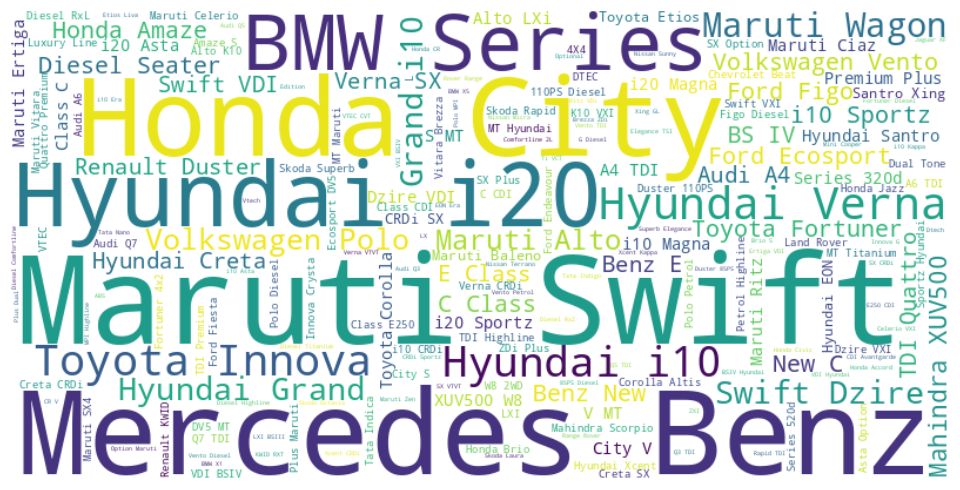

In [ ]:
from wordcloud import WordCloud
text = ' '.join(data['Name'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()

plt.show()


The form above presents a scenario where the "name" column contains a substantial number of distinct values. Employing a one-hot encoder to address this issue could lead to heightened complexity within the model. However, an alternative strategy could involve extracting the initial portion of the "name" as a potential "brand" identifier. This approach holds the promise of reducing the overall count of unique values, potentially streamlining subsequent data processing and analysis. By adopting this method, you can strike a balance between managing complexity and retaining valuable information from the "name" column.

<Figure size 1000x600 with 0 Axes>

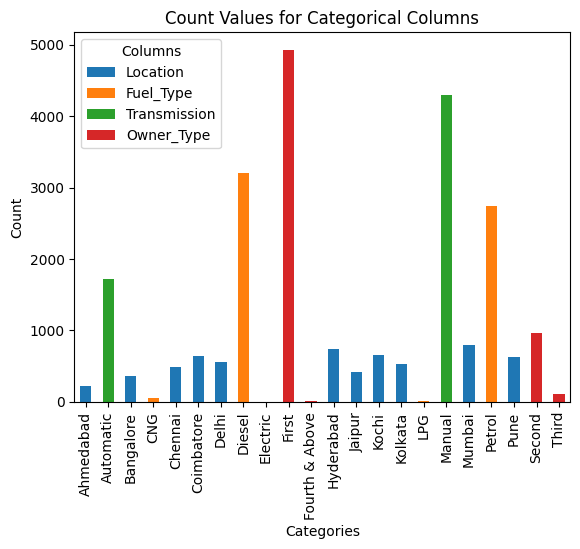

In [ ]:
cat_names = ['Location','Fuel_Type','Transmission','Owner_Type']

count_df = data[cat_names].apply(pd.value_counts)

plt.figure(figsize=(10, 6))
count_df.plot(kind='bar', stacked=True)
plt.title('Count Values for Categorical Columns')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.legend(title='Columns')
plt.show()

From an aerial perspective, when contemplating the visualization of the dataset, we discern that the categorical data therein is not abundant. Consequently, various encoding methodologies can be judiciously employed to effectively represent this categorical information.

In respect to the "Location" column, it becomes apparent that the intrinsic sequence or arrangement of entries bears no significance. In light of this, a suitable approach would involve the utilization of a `one-hot encoder`. This technique transforms each unique location into a distinct binary attribute, thus capturing the absence or presence of a particular location without introducing any implied hierarchy.

In stark contrast, when scrutinizing the "Owner Type" column, the relative order or hierarchy amongst the distinct categories assumes importance. To faithfully preserve this ordinal relationship, opting for a `label encoder` emerges as a prudent choice. This encoding strategy entails assigning a numerical label to each category, thereby ensuring that the encoded values reflect the inherent sequence of the original data.

Transitioning to the "Fuel Type" column, a similar consideration emerges as witnessed in the "Location" column. The disposition of fuel types, devoid of any inherent order, renders the `one-hot encoder` a fitting selection. This encoding technique endows each distinct fuel type with a dedicated binary attribute, facilitating the encapsulation of the categorical information without imparting any unintended hierarchy.

Finally, a cursory examination of the "Transmission" column discloses that it encompasses merely two discrete values. Given this binary nature, resorting to a `label encoder` proves to be a pragmatic decision. Through this encoding methodology, the distinct transmission options are numerically represented while upholding their inherent duality.

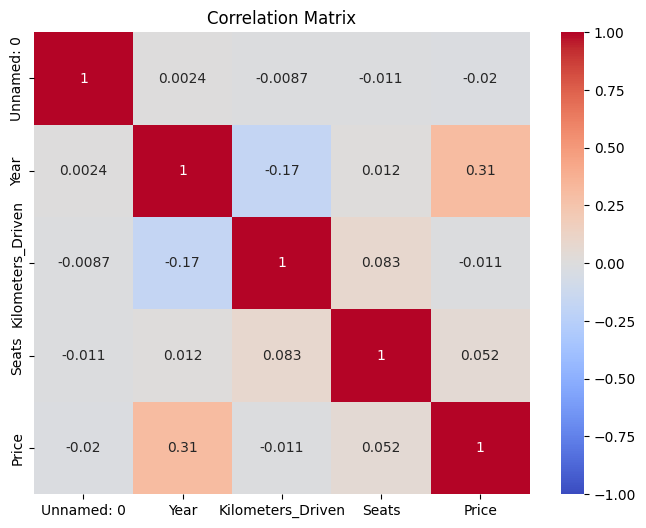

In [ ]:
corr_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


The provided Correlation Matrix reveals that there is no discernible strong linear relationship between the target column 'price' and the remaining features.

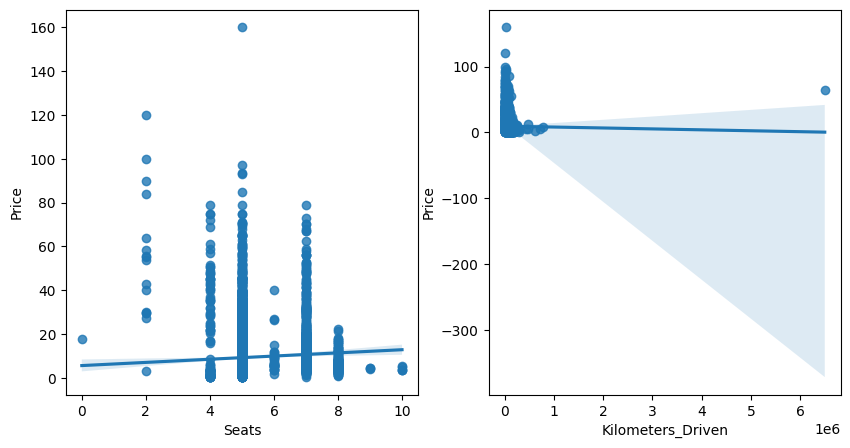

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (10, 5), ncols=2,sharey=False)
sns.regplot(x=data.Seats, y=data.Price, ax=ax1)

sns.regplot(x=data.Kilometers_Driven, y=data.Price, ax=ax2);

The scatter plots depicted above reaffirm the observation made in the correlation matrix analysis – that there exists no prominent or strong relationship between the target column 'price' and the other features.

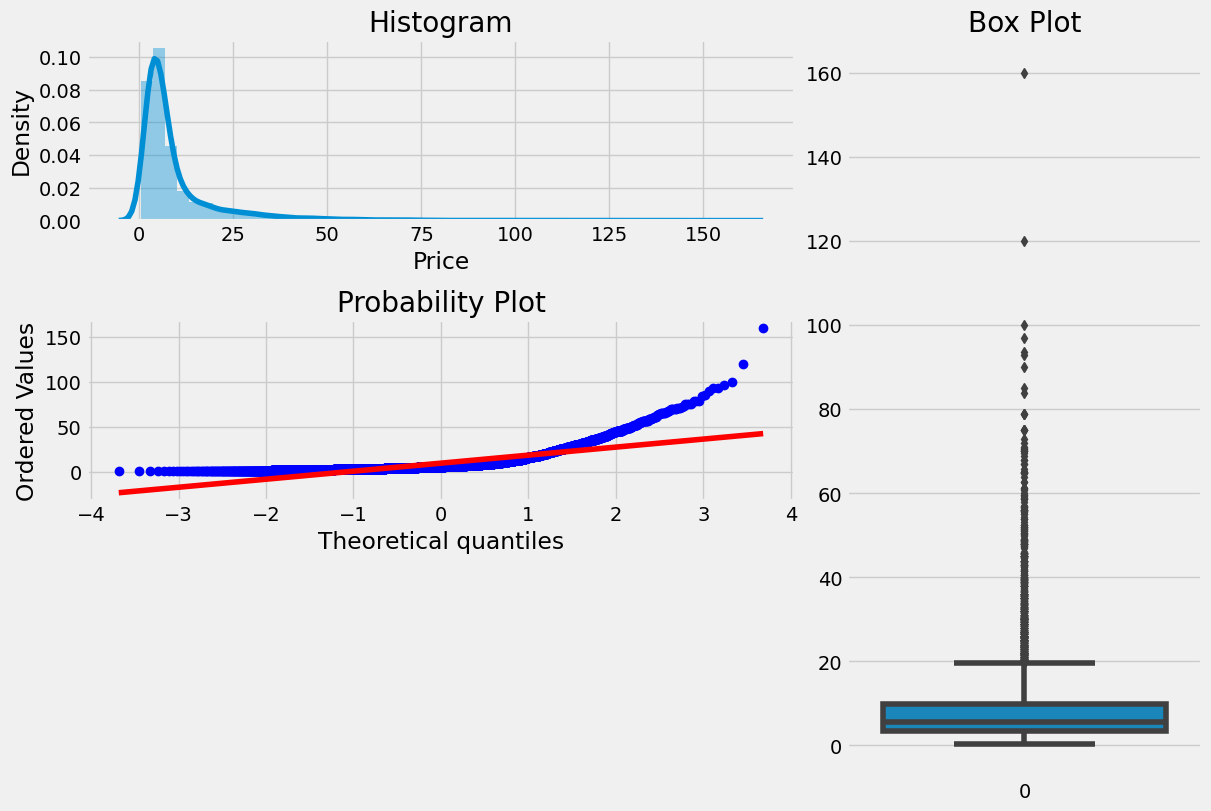

In [ ]:
def plotting_3_chart(data, feature):

    style.use('fivethirtyeight')
    ## Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title.
    ax1.set_title('Histogram')
    ## plot the histogram.
    sns.distplot(data.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title.
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot.
    stats.probplot(data.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title.
    ax3.set_title('Box Plot')
    ## Plotting the box plot.
    sns.boxplot(data.loc[:,feature], orient='v', ax = ax3);
    plt.style.use('default')
    plt.show();


plotting_3_chart(data, 'Price')

The provided visuals highlight key insights about the target column 'price' :

The target variable's histogram reveals a right-skewed distribution, indicating some unusually high values. To enhance compatibility with certain analyses, a transformation aiming for a more normal distribution is recommended.

The box plot identifies outliers, particularly in the range of 20 to 160, which could potentially impact analysis results. Addressing these outliers through appropriate techniques will help ensure robust and accurate analyses.

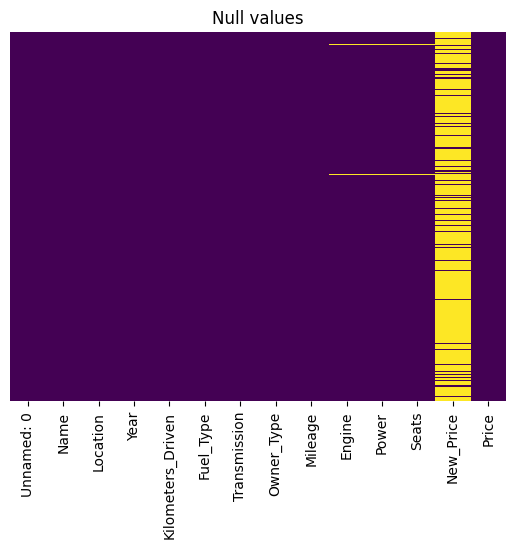

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null values')
plt.show()


From the visualization above, we can observe the presence of null values. These null values are represented by the yellow lines.

###Prepare the data

Feautre Engineering


As mentioned earlier, the columns Mileage, Power, and Engine contain both text and numerical components. To extract the numerical part, I utilized the `split` function.

In [ ]:
data['Mileage(km)'] = data['Mileage'].str.split(' ').str.get(0)
data['Mileage(km)'] = data['Mileage(km)'].astype(float)

In [ ]:
data['Mileage(km)/'] = data['Mileage'].str.split(' ').str.get(1)

In this context, I have stored the text portion in new features since it consists of only two words (km/kg, kmpl). We can address this later by applying a `label encoder` to it.

In [ ]:
data['Power(Php)'] = data['Power'].str.split(' ').str.get(0)
data['Power(Php)'] = data['Power(Php)'].replace('null', np.nan)
data['Power(Php)'] = pd.to_numeric(data['Power(Php)'], errors='coerce')
median_value = np.nanmedian(data['Power(Php)'])
data['Power(Php)'].fillna(median_value, inplace=True)
data['Power(Php)'] = data['Power(Php)'].astype(float)

In [ ]:
data['Engine(CC)'] = data['Engine'].str.split(' ').str.get(0)
data['Engine(CC)'] = data['Engine(CC)'].replace('null', np.nan)
data['Engine(CC)'] = pd.to_numeric(data['Engine(CC)'], errors='coerce')
median_value = np.nanmedian(data['Engine(CC)'])
data['Engine(CC)'].fillna(median_value, inplace=True)
data['Engine(CC)'] = data['Engine(CC)'].astype(float)

As previously observed, the Name column contains numerous distinct values. To reduce this, I will create a new feature called "brand" by extracting the initial portion of the name

In [ ]:
brand = data['Name'].str.split(' ').str.get(0)

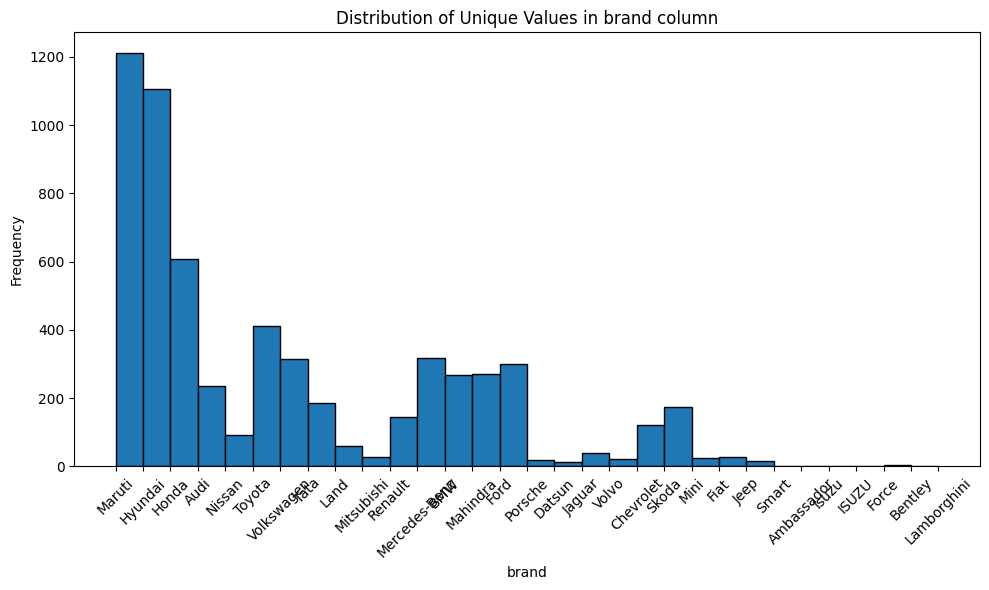

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(brand, bins=30, edgecolor='black')
plt.title('Distribution of Unique Values in brand column')
plt.xlabel('brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

As indicated in the histogram above, we have already reduced the values in the Name column; however, there is still a considerable number of values remaining. Applying the one-hot encoder in this situation would lead to the creation of numerous features, thereby increasing the overall complexity.

Dealing with null values

As mentioned earlier, we have a small number of missing values. I addressed this by filling them with the median value. Regarding the Mileage column, I eliminated the null values since I separated it into two columns: one for numerical values and the other for categorical values. The new Price column contains a significant amount of missing values, which I plan to address at a later stage by removing it.

In [ ]:
data = data[data['Mileage'].notna()]

In [ ]:
data['Seats'].fillna(data['Seats'].median(),inplace=True)

In [ ]:
data['Power(Php)'].fillna(data['Power(Php)'].median(),inplace=True)

Dealing with categorical data

I handle the categorical data using both one-hot encoding and label encoding techniques.

As previously mentioned, for the Location and Fuel Type columns, I will apply one-hot encoding since the order of categories does not hold significance. On the other hand, I will use label encoding for the Owner Type, Transmission, and Mileage columns.

In [ ]:
Location = data[['Location']]
Location = pd.get_dummies(Location,drop_first=True)

In [ ]:
Fuel_Type = data[['Fuel_Type']]
Fuel_Type = pd.get_dummies(Fuel_Type,drop_first=True)

In [ ]:
encoder = LabelEncoder()
data['Owner_Type'] = encoder.fit_transform(data['Owner_Type'])

In [ ]:
data['Transmission'] = encoder.fit_transform(data['Transmission'])

In [ ]:
data['Mileage(km)/'] = encoder.fit_transform(data['Mileage(km)/'])

Here, I have eliminated the unnecessary columns.

In [ ]:
data.drop(columns=['Unnamed: 0','Engine','Power','Mileage',
                   'Name','New_Price','Location','Fuel_Type'],axis=1,inplace=True)

In [ ]:
new_data= pd.concat([data,Location,Fuel_Type],axis=1)

Normality

As previously observed, the 'Price' target exhibits a right-skewed distribution. To address this, we will apply a log transformation to rectify the distribution and achieve a more normal pattern

However, initially, I will assess its normality through statistical means by employing the `normaltest` function. A substantial p-value (>0.05) would indicate that the target variable follows a normal distribution.

In [ ]:
normaltest(new_data.Price)

NormaltestResult(statistic=4384.682355060835, pvalue=0.0)

As we can see, the p-value is very small, so it is not normally distributed.

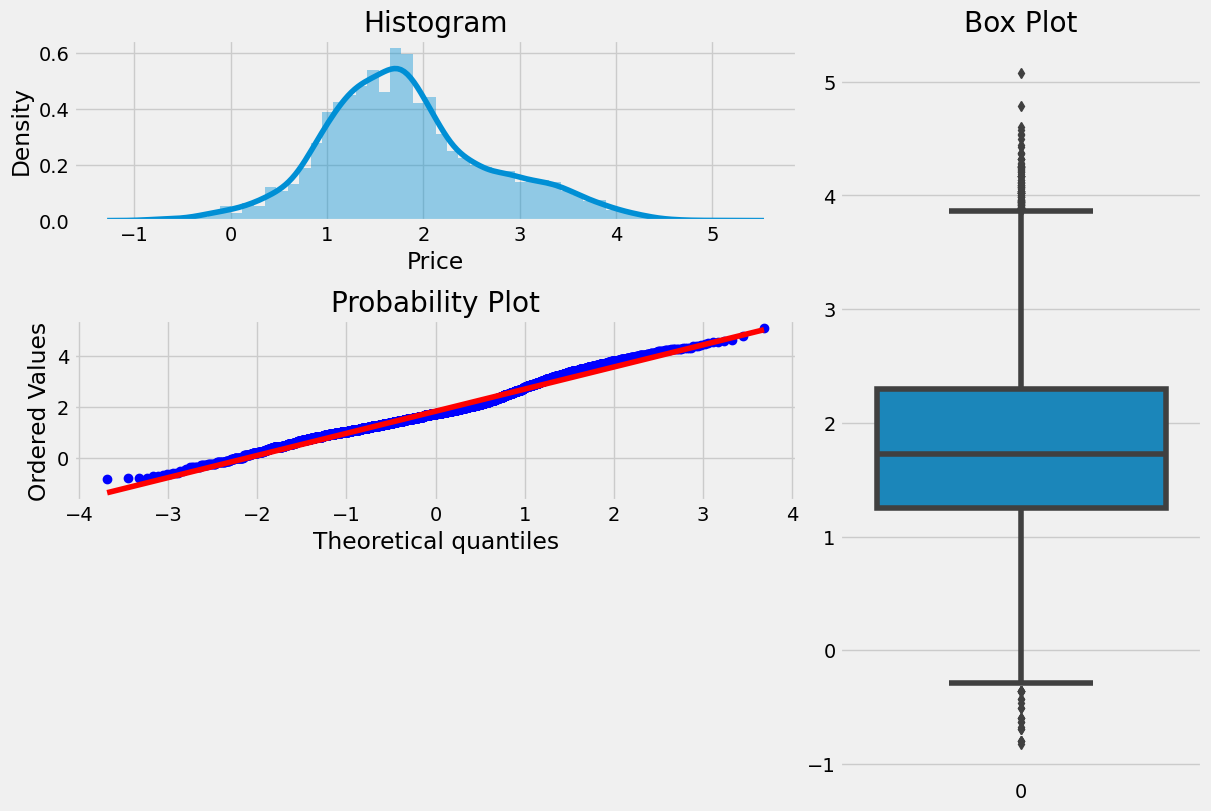

In [ ]:
new_data['Price'] = np.log(new_data['Price'])
plotting_3_chart(new_data, 'Price')

Let's check our p-value, after the transformation.

In [ ]:
normaltest(new_data.Price)

NormaltestResult(statistic=168.78393668975104, pvalue=2.2337462214200026e-37)

As we can see, the log method transformed 'price' distribution into a more symmetrical bell curve. It is still not perfect, but it is much closer to being normally distributed.

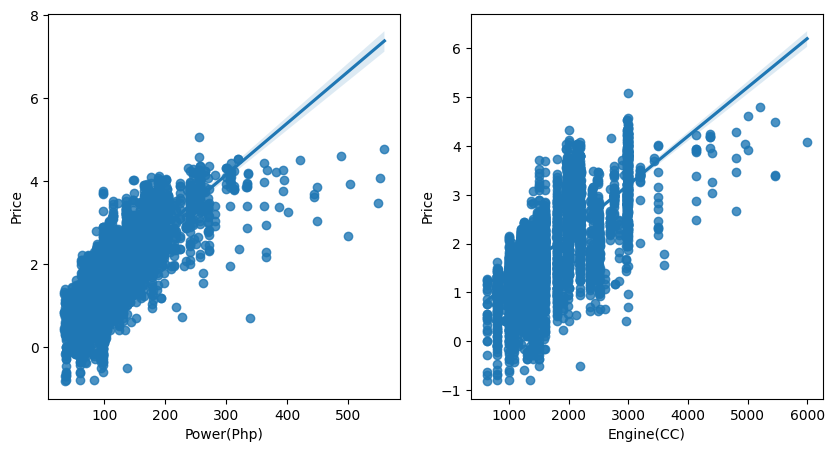

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (10, 5), ncols=2,sharey=False)

sns.regplot(x=new_data['Power(Php)'], y=new_data['Price'], ax=ax1)
sns.regplot(x=new_data['Engine(CC)'], y=new_data['Price'], ax=ax2)
plt.show()

As evident from the scatter plots above, following data preparation, a robust linear relationship emerges with the target column 'price'.

###Create a Test Set and Train Set

I will now divide the data into training and testing sets.

In [ ]:
x,y=new_data.drop(columns=['Price'],axis=1),new_data['Price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,
                                                    random_state=42)

###Select and Train a Model

Having completed the data preparation and the division into training and testing sets, we are now prepared to proceed with model selection.

Liner Regression

As observed previously, there exists a linear relationship with certain features. Therefore, it is necessary to assess linear regression through the utilization of cross-validation techniques.

In [ ]:
pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('liner',LinearRegression())
])

In [ ]:
scores = -cross_val_score(pipe, x_train,
                          y_train, scoring='neg_root_mean_squared_error')

In [ ]:
print('RMSE (error) : ',scores.mean())
print('Variance : ',scores.var())

RMSE (error) :  0.31602384761328894
Variance :  0.0008948343700621011


In [ ]:
scores = cross_val_score(pipe, x_train,
                          y_train, scoring='r2')

In [ ]:
print('R-squared (R²) : ',scores.mean())

R-squared (R²) :  0.8674951655443464



As seen earlier, linear regression provides favorable outcomes. The root mean square error (RMSE) stands at 0.31, indicating minimal variance. Additionally, the R-squared (R2) score is 0.86. Notably, there is an absence of both overfitting and underfitting, as evident from the results.

Liner regression with polynomial features

Now, let's attempt linear regression with polynomial features.

In [ ]:
pipe = Pipeline([
    ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),
    ('scaler',StandardScaler()),
    ('liner',LinearRegression())
])

In [ ]:
scores = -cross_val_score(pipe, x_train,
                          y_train, scoring='neg_root_mean_squared_error')

print('RMSE (error) : ',scores.mean())
print('Variance : ',scores.var())

RMSE (error) :  66687107140.33711
Variance :  1.3284199130466508e+22


In [ ]:
scores = cross_val_score(pipe, x_train,
                          y_train, scoring='r2')

print('R-squared (R²) : ',scores.mean())

R-squared (R²) :  -2.3797662178227335e+22


As noticed, employing linear regression with polynomial features yields unfavorable outcomes—characterized by substantial errors and heightened variance. The negative R2 score indicates an overfitting scenario. This is understandable considering that, as previously observed, the relationship between the features leans more towards linearity rather than polynomiality.

Ridge Regression

Now, let's attempt ridge regression.

In [ ]:
pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('Ridge',Ridge(alpha=0.001))
])

In [ ]:
scores = -cross_val_score(pipe, x_train,
                          y_train, scoring='neg_root_mean_squared_error')

print('RMSE (error) : ',scores.mean())
print('Variance : ',scores.var())

RMSE (error) :  0.3153027260671394
Variance :  0.0008130490505862254


In [ ]:
scores = cross_val_score(pipe, x_train,
                          y_train, scoring='r2')

print('R-squared (R²) : ',scores.mean())

R-squared (R²) :  0.8681832098402401


Ridge regression proves highly beneficial in mitigating overfitting issues within linear regression. As observed earlier, the outcomes of linear regression reveal the absence of overfitting, as the results from ridge regression closely resemble those of linear regression.

Ridge regression with polynomial features

Now, let's attempt ridge regression with polynomial features.

In [ ]:
pipe = Pipeline([
    ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),
    ('scaler',StandardScaler()),
    ('Ridge',Ridge(alpha=0.01))
])

In [ ]:
scores = -cross_val_score(pipe, x_train,
                          y_train, scoring='neg_root_mean_squared_error')

print('RMSE (error) : ',scores.mean())
print('Variance : ',scores.var())

RMSE (error) :  1.0173033613047324
Variance :  2.1849093255455267


In [ ]:
scores = cross_val_score(pipe, x_train,
                          y_train, scoring='r2')

print('R-squared (R²) : ',scores.mean())

R-squared (R²) :  -3.1279126518323674


After attempting ridge regression with polynomial features, we observe improved results compared to liner regression with polynomial features. However, overfitting still persists as indicated by the negative R2 value.

Lasso Regression

Now, let's attempt lasso regression.

In [ ]:
pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('Lasso',Lasso(alpha=0.001))
])

In [ ]:
scores = -cross_val_score(pipe, x_train,
                          y_train, scoring='neg_root_mean_squared_error')

print('RMSE (error) : ',scores.mean())
print('Variance : ',scores.var())

RMSE (error) :  0.31438112041552524
Variance :  0.0007243755336657083


In [ ]:
scores = cross_val_score(pipe, x_train,
                          y_train, scoring='r2')

print('R-squared (R²) : ',scores.mean())

R-squared (R²) :  0.8690413856751631


The lasso provides us with both linear and ridge outcomes, yet typically yielding weaker ridge results. However, it's important to note that we currently have numerous features, highlighting the advantageous effects of lasso.

Lasso regression with polynomial features

Now, let's attempt lasso regression with polynomial features.

In [ ]:
pipe = Pipeline([
    ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),
    ('scaler',StandardScaler()),
    ('Lasso',Lasso(alpha=0.001))
])

In [ ]:
scores = -cross_val_score(pipe, x_train,
                          y_train, scoring='neg_root_mean_squared_error')

print('RMSE (error) : ',scores.mean())
print('Variance : ',scores.var())

RMSE (error) :  0.9300953288236116
Variance :  1.7049580737383008


In [ ]:
scores = cross_val_score(pipe, x_train,
                          y_train, scoring='r2')

print('R-squared (R²) : ',scores.mean())

R-squared (R²) :  -2.2954527844242536


After attempting lasso regression with polynomial features, we observe improved results compared to liner regression with polynomial features. However, overfitting still persists as indicated by the negative R2 value.

###hyperparameter tuning

Before discussing linear regression, it's worth noting that both ridge and lasso regression provided us with similar outcomes. Although the disparities were minor, lasso exhibited a slightly better performance. In the following, we will explore hyperparameter tuning specifically for lasso regression.

In [ ]:
final_pipline = Pipeline([
    ('polynomial', PolynomialFeatures(include_bias=False,degree=1)),
    ('scaler',StandardScaler()),
     ('model',Lasso())
])


In [ ]:
param_grid = {
    "polynomial__degree": [1,2,3,4],
    "model__alpha":[0.0001,0.001,0.01,0.1,1,10],
    "model__fit_intercept": [True, False]
    }

search = GridSearchCV(final_pipline, param_grid, n_jobs=2)
search.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(degree=1,
                                                           include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             n_jobs=2,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'model__fit_intercept': [True, False],
                         'polynomial__degree': [1, 2, 3, 4]})

In [ ]:
search.best_score_

0.879370505951683

In [ ]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', Lasso(alpha=0.01))])

###Evaluation

Finally, after selecting the best model and performing hyperparameter tuning on it, we will now proceed to test and evaluate the model using the testing set that we obtained earlier during the data splitting process.

In [ ]:
final_predictions = best.predict(x_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print('RMSE : ',final_rmse)

RMSE :  0.31281847477826424


In [ ]:
r2 = best.score(x_test,y_test)
print('R-squared (R²) : ',r2)

R-squared (R²) :  0.8744912219720047


Looking at the final results, we can see that they are very similar to the training results. This suggests that we don't have overfitting, which is a positive outcome. The results are also favorable, with an RMSE of 0.31 and an R2 of 0.87. Considering these values, we can conclude that there is no significant underfitting issue either.

# Results and discussion

In this project, my objective is to achieve the highest prediction accuracy possible. I employed various regression models, including linear regression, ridge regression, and lasso regression. Additionally, I conducted evaluations using different metrics such as RMSE (root mean squared error) and R2 (R-squared). Here are the outcomes of our analyses:


| Model     | RMSE | R-squared       |
|----------|-----|----------------|
| Linear regression    | 0.31602384761328894  | 0.8674951655443464       |
| Ridge regression      | 0.3153027260671394  | 0.8681832098402401 |
| Lasso regression  | 0.31438112041552524  | 0.8690413856751631         |

Based on the provided metrics, it seems that all three regression models have relatively close performance results. The R-squared values are quite high, indicating that a significant portion of the variance in the target variable is explained by the models. The RMSE values are also quite low, suggesting that the models' predictions are relatively close to the actual data points.

Now, let's attempt polynomial features:

| Model     | RMSE | R-squared       |
|----------|-----|----------------|
| Linear regression    | 66687107140.33711  | -2.3797662178227335e+22       |
| Ridge regression      | 1.0173033613047324  | -3.1279126518323674 |
| Lasso regression  | 0.9300953288236116  | -2.2954527844242536         |

The metrics have changed significantly compared to the previous results.

The extremely large negative R-squared values are an indication that the models are performing poorly with the current set of features. Negative R-squared values are not meaningful and suggest that the models are fitting the data very poorly. It's possible that the introduction of polynomial features might have caused issues such as multicollinearity, overfitting, or some other form of data mismatch that is causing the models to perform badly.

The outcomes (excluding polynomial features) are favorable. The three models exhibit similar results, with Lasso regression performing slightly better. The difference in performance is minimal. These are the results obtained after applying hyperparameters to the testing data.

| Model     | RMSE | R-squared       |
|----------|-----|----------------|
| Lasso regression  | 0.31281847477826424  | 0.8744912219720047        |

As we observe the outcomes in the testing data, they are very similar to those in the training data. This suggests that there is no overfitting.

When optimizing the tuning of hyperparameters, we established the alpha value within the range of 0.0001 to 10.

The optimal model was achieved with an alpha value of 0.01.

The term "alpha" in Lasso regression refers to the regularization strength parameter. It's a hyperparameter that determines the balance between fitting the model to the training data and shrinking the coefficients towards zero. A higher alpha value leads to stronger regularization, which can result in more coefficients being driven to exactly zero. This property of Lasso makes it useful for feature selection, as it can effectively discard less important features from the model.

# Next Steps

Our next project steps are as follows:
1. Initially, we will assess the model's performance using new testing data.
2. Following that, we will present a report to experts who are familiar with the data.
3. Lastly, we plan to implement this model in other projects, such as applications and web pages.